In [6]:
%autosave 20
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Autosaving every 20 seconds


# Background

## 용어정리
- (표본)통계량(statistics,sample statistics) : 확률표본으로부터 계산되며 표본의 특성을 나타내는 값.
- 추정량(estimator) : 모수를 추정할 수 있는 (표본)통계량.
- 추정값 : 관측한 표본으로부터 계산한 추정량의 값.

## 정규분포

- 확률변수 $X \sim \mathcal{N}(\mu,\sigma^2)$라 하자.

$$
\begin{aligned}
&P(\mu - 2\sigma \leq X \leq \mu + 2\sigma) \approx 0.95 \\
\end{aligned}
$$

- 즉, 평균으로부터 +- 2표준편차인 구간안에 확률변수 X가 값을 가질 확률이 약 95%이다.

- 이 외에도 표준정규분포표나 다양한 라이브러리를 통하여 확률과 그 확률에 대응하는구간을 구할 수 있다.

# 통계적 추정

- 모집단의 특성값인 모수(parameter)가 우리가 알고싶은 것이다.
    - 전북대학교 남학생들의 평균 성적 등등...
- 통계적 추정 : 확률표본을 사용하여 모집단의 모수 추정 e.g. 모평균,모비율
- 예를 들자면? 
    - 모평균의 추정 : 확률표본으로부터 계산된 표본평균을 추정량으로 사용
    - 모비율의 추정 : 확률표본으로부터 계산된 모비율을 추정량으로 사용.


# 추정량의 성질

## 추정량의 임의성

- 추정량은 표본으로부터 모집단으로부터 표본이 임의적으로(random) 추출되기 때문에 임의성(randomness)를 갖는다.

### 예시

- 10만명으로 구성된 선거구, A 후보를 지지하는 사람이 6만명, 지지하지 않는 사람이 4만명인 모집단.
- i.e. 모집단의 크기 $N=100000$, 지지율 $\theta = 0.6$

1. 모집단 생성

In [7]:
N = 100000 #모집단의 크기
favor = 60000 #지지하는 유권자의 수
opposite = N - favor

P = np.concatenate((np.ones(favor),np.zeros(opposite)),axis=0)
P.shape

(100000,)

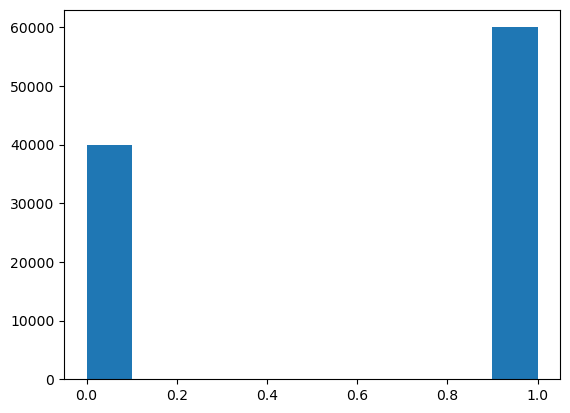

In [8]:
plt.hist(P)
plt.show()

2. 모비율 확인

In [9]:
P.mean()

0.6

3. 표본 추출

In [10]:
sample = np.random.choice(P,1000,replace=False)
sample[:100]

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.])

4. 표본비율 계산

In [11]:
hat_theta = sample.mean()
hat_theta

0.59

5. 표본을 또 한번 추출하여 표본비율 계산

In [12]:
sample = np.random.choice(P,replace=False,size=1000)
hat_theta = sample.mean()
hat_theta

0.615

- 추출할 때마다 다른 표본이 뽑히므로 추정량의 값(추정값)이 변화한다.
- 그런데 각각 값들은 모집단의 지지율인 0.6과 아주 많이 차이나진 않는다.

## 추정량의 평균

- 추정량은 임의적이기 때문에 표본을 관측하기 전 까지는 알 수 없다.
- 표본을 관측하면 추정량의 값을 구할 수 있으며 이 값을 `추정값(estimate)`이라고 한다.

- 서로다른 여러개의 표본으로부터 각각 계산된 추정값들의 평균$\bar\theta$은 어떻게 될까?
- i.e. $$\bar\theta = \frac{\sum_{i=1}^{1000}\hat\theta_i}{1000}$$ (추정값들이 1000개 있다고 하자.)

In [13]:
B = 1000 # 모의실험의 횟수
n = 1000
estimates = pd.DataFrame({'sample_rate':np.zeros(B)})

for i in np.arange(B):
  sample = np.random.choice(P, n, replace=False)
  estimates.loc[i,'sample_rate'] = np.mean(sample)

estimates

,sample_rate
0,0.591
1,0.603
2,0.624
3,0.597
4,0.582
...,...
995,0.604
996,0.592
997,0.608
998,0.610


In [14]:
estimates.mean()

sample_rate    0.599952
dtype: float64

In [15]:
P.mean() - estimates.mean()

sample_rate    0.000048
dtype: float64

- 모의 실험으로부터 얻은 1000개의 추정값들의 평균은 모집단의 지지율 0.6과 매우 유사하다.

$$\bar\theta = \frac{\sum_{i=1}^{1000}\hat\theta_i}{1000} \approx \theta$$

## 중심극한정리

- 추정량의 분포를 한 번 살펴보자.

<AxesSubplot:ylabel='Frequency'>

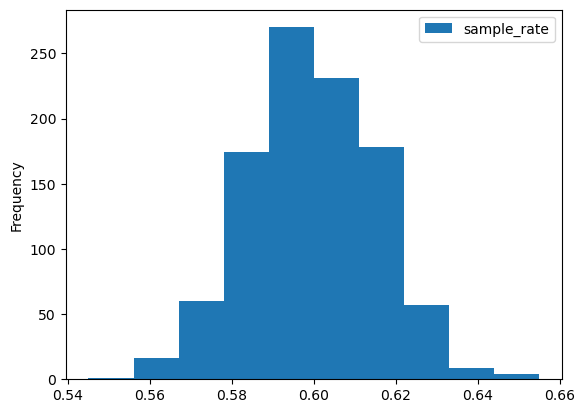

In [16]:
estimates.plot.hist()

- 추정량의 분포는 0.6을 중심으로 종모양의 정규분포처럼 보인다.(잘보면 보임ㅎ)

- 사실 이는 추정량의 분포가 정규분포를 따른다는 중심극한정리에 의한 내용이다.

::;{.callout-note}
#### 중심극한정리(Central Limit Theorem)
$X_1,X_2,\dots,X_n \overset{\text{i.i.d}}{\sim} f_X(x;\mu,\sigma^2)$라고 하자. 이때 아래와 같은 식이 성립한다.
$$\bar X = \frac{X_1 + X_2 + \dots + X_n}{n} \sim \mathcal{N}(\mu,\frac{\sigma^2}{n})$$
일반적으로 $n \geq 30$이라고 가정한다.
:::

쉽게 풀어쓰자면
- 평균이  $\mu$이고, 분산이  $\sigma^2$ 인  모집단에서  n개의  표본을  추출하는  경우에  n이  충분히  크면( n ≥ 30 ,i.i.d)
- 모집단의  분포에  관계없이 표본평균 $\bar X$가 정규분포를 따르며
- 그때의 $E(\bar X) = \mu, Var(\bar X) = \frac{\sigma^2}{n}$라는 의미이다.
- point
    - 정규분포에서 추출 안해도 정규분포가 됨(모집단이 뭘 따르던 상관 X)
    - i.i.d가정이 필요(고전적인 CLT)
    - 다른 CLT도 있는데 그건 같은분포에서 추출 안해도 된다고 함.독립이기만 하면 됨.(wiki 참고 ㄱㄱ)

![](./fig.png)

- 위의 그림이 잘 설명해줌
    - 이항분포던,푸아송이던 ... 어떤 분포던지간에 표본의 크기가 충분히 크면
    - 표본평균의 분포는 정규분포임을 확인

## 추정량의 분포 

- 표본비율(추정량,표본지지율)의 분포를 구해보자.
- 중심극한정리에 의하면 다음과 같다.

$$
\begin{aligned}
\hat\theta \sim \mathcal{N}(\mu(=\theta),\frac{\sigma^2}{n})
\end{aligned}
$$

- 우리가 모르는 것은 우리가 정말 궁금한 $\mu$와 분산인 $\sigma^2$이다.
- $\frac{\sigma^2}{n}$은 우리가 여러개의 표본으로부터 얻은 추정값들로 어떻게든 구해볼 수 있을 것 같다.
    - $\hat\theta_1,\hat\theta_2,\hat\theta_3\ \dots$들의 표본분산으로 구하면 될 것 같다.
    - 여러개의 추정값들로 그러면 $\mu$도 구할 수 있는 것 아니냐?라는 의문이 생기는데??
        - 이 경우 $\mu = E(\hat\theta) \approx$ 표본평균 이라고 생각히가 때문이다.
        - 잘 모르겠다. 하지만 책에서 분산만 일단 전개하므로 여기서도 분산만 가지고 전개.

- 즉 아래와 같이 표본분산으로 추정할 수 있을 것 같다.

$$
\begin{aligned}
&Var(\hat\theta) = \frac{\sigma^2}{n} \approx \frac{\sum_{i=1}^{n}(\hat\theta_i - \bar\theta  )^2}{n-1} \text{     (sample variance)}\\ 
&\Longleftrightarrow Sd(\hat\theta) = \frac{\sigma}{\sqrt{n}} \approx \sqrt{\frac{\sum_{i=1}^{n}(\hat\theta_i - \bar\theta  )^2}{n-1}}\text{(sample  standard deviation)}\\
&\text{where, } \bar\theta = \frac{1}{n}\sum_{i=1}^{n}\hat\theta_i
\end{aligned}
$$

- 결과적으로 표본비율의 분포는 아래와 같다고 할 수 있을 것이다.

$$
\begin{aligned}
\hat\theta \sim \mathcal{N}(\mu(=\theta),Sd^2)
\end{aligned}
$$

## 구간추정

- 점추정은 하나의 특정 값으로 모수를 추정하는 방법이였다. 하지만 단점이 있다.
   1. 추정이 얼마나 정확한가,불확실한가를 판단하기가 불가능하다. 
   2. 하나의 값을 제시하기에 유연하지 못하고 틀릴 가능성이 높음
- 이러한 단점을 보완할 수 있는 방법은 구간추정(interval estimation)이
- 구간추정은 모수에 다한 구간(신뢰구간)과 확률(신뢰도)을 제시하는 추정이며 점추정에 비해 장점이 있음.
    1. 구간을 사용하여 더 유연+견고한 주장을 제시할 수 있음(하나의 값 제시하는게 아니라 ~사이에 있을거다라고 말하는 것이기 때문)
    2. 확률을 제시해 추정이 얼마나 정확한가 제시할 수 있다.(확률 95%,80%로 불확실성을 제시해줄 수 있다.)
- 목적
    1. 모수 추정
    2. 구간,확률을 제시하여 더 견고한 $\to$주장 + 불확실성을 제시하여 추정의 정확도 판단.

- 구간추정은 어떻게 하는가?(유도해보기)

**(알고 있는 사실)**<br>
$$\hat\theta \sim \mathcal{N}(\mu,SD^2) \to P(\mu - 2SD \leq \hat\theta \leq \mu + 2SD) = 0.95\text{  (그냥 equal로 놓자.)}$$ 

**(식 살짝 바꾸기)**

$$
\begin{aligned}
&P(\mu - 2SD \leq \hat\theta \leq \mu + 2SD) = 0.95 \nonumber \\
&\Longleftrightarrow P(-2SD\leq \hat\theta-\mu \leq +2SD) = 0.95 \nonumber  \\
&\Longleftrightarrow P(-\hat\theta-2SD \leq -\mu \leq -\hat\theta+2SD) = 0.95 \nonumber  \\
&\Longleftrightarrow P(\hat\theta-2SD \leq \mu \leq \hat\theta+2SD) = 0.95 \nonumber  \\
&\Longleftrightarrow P(\mu \in [\hat\theta-2SD,\hat\theta+2SD]) = 0.95  \\
&\Longleftrightarrow P(|\mu - \hat\theta| \leq 2SD) = 0.95 \\
\end{aligned}
$$

- 윗 식을 해석해보면?
    - 모수 $\mu$가 우리가 관측한 추정량 $\hat\theta \pm 2SD$인 구간에 속할 확률이 95%다.
    - 모수 $\mu$와 우리가 관측한 추정량 $\hat\theta$의 차이가 $2SD$보다 작을 확률이 95%다.
- 결과적으로 모수를 추정함과 동시에 더 유연한 주장 + 불확실성 제시(목적달성).
- 왜 추정량의 분포를 알아야 했던거지?
    - 확률표본은 모집단으로 부터 임의적으로 추출되기때문에 나타날 수 있는 오차를 추정량의 분포를 이용하여 제시!
- 용어정리
    - 95%는 신뢰수준
    - 2SD는 표본오차(sampling error)
    - 위에서 나온 구간은 신뢰구간 이라고 함.
    - "모평균 $\mu$에 대한 신뢰수준 95%에 대한 신뢰구간은 $[\hat\theta-2SD,\hat\theta+2SD]$이다"라고 표현.

In [60]:
AVG=  float(estimates.mean()) # B개의 지지율의 평균  
SD = float(estimates.std())   # B개의 지지율의 표준편차

sim_summary = pd.DataFrame({ 'Mean of sample_rates': [AVG], 'SD' : [SD], 'Sampling Error' : [2*SD] })

sim_summary

,Mean of sample_rates,SD,Sampling Error
0,0.49992,0.01581,0.031619


In [61]:
[AVG - 2* SD, AVG + 2*SD ]

[0.46830066758797456, 0.5315393324120261]

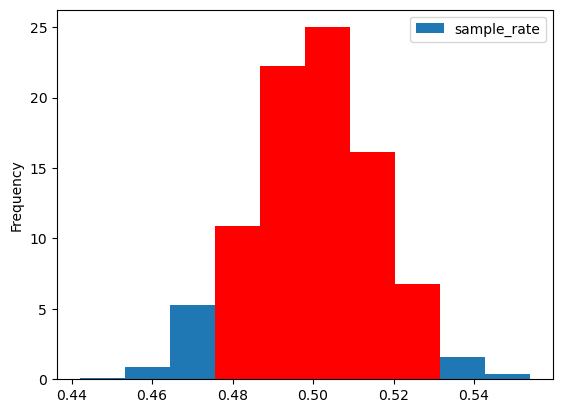

In [62]:
# 히스토그램
p= estimates.plot.hist( density=True)

# 모집단의 지지율에서 2SD 만큼 벌어진 구간(95%)은 빨간색으로 
for rectangle in p.patches:
    if rectangle.get_x() >=  (AVG - 2*SD) and rectangle.get_x() <=  (AVG + 2*SD) :
        rectangle.set_facecolor('red')

In [64]:
[AVG - 2* SD, AVG + 2*SD ]

[0.46830066758797456, 0.5315393324120261]

In [110]:
((estimates.sample_rate >= (AVG - 2* SD) ) & (estimates.sample_rate <= (AVG + 2* SD))).mean()

0.96

# 정리

- 모집단은 관심이 있는 전체 집단이다,모수는 모집단의 특성값이다.
- 확률표본은 모집단의 구성원이 표본에 속할 확률을 미리 알고 있으며 그 확률에 따라서 추출한 표본이다.
- 표본 자료의 분포는 모집단의 분포와 유사하게 나타난다.
- 추출된 표본으로 부터 얻은 추정량의 값이 모수와 얼마나 차이가 나는지는 알 수가 없다.
- 하지만 표본의 크기가 커질수록 $\to$ SD가 감소 $\to$ 추정량의 값은 모수에 가깝게 나타날 가능성(확률)이 높아진다.
- 또한 표본의 크기가 크면 추정량의 분포는 정규분포와 매우 유사하다.(by CLT)
- 따라서 추정량의 분포에 대한 성질을 정규분포의 성질을 이용하여 말할 수 있다.(by CLT)
- 추정량의 표준편차를 SD 라고 하면 추정량의 값과 모수의 차이가 2*SD 이내일 확률은 약 95% 이라고 말할 수 있다.(by CLT + 정규분포 확률)